---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [2]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [7]:
def answer_one():
    
    # Your code here
    raw = pd.read_csv('fraud_data.csv')
    
    pct_fraud = np.sum(raw['Class'])/len(raw['Class'])
    
    return pct_fraud

a = answer_one()
# a.head()
a
# type(a)

0.016410823768035772

In [8]:
# total of 21,693 examples
# mask = (df['Class'] == 1)
# frauds = df.loc[mask]
# len(frauds)
# a = 356/21693
# a

In [9]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')


X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [10]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Your code here
    dummy_maj = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    y_pred = dummy_maj.predict(X_test)
    
    acc = dummy_maj.score(X_test, y_test)
    rcl = recall_score(y_test, y_pred)
          
    return acc, rcl

# a = answer_two()
# a

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [12]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    svm = SVC().fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = svm.score(X_test, y_test)
    rcl = recall_score(y_test, y_pred)
    pcs = precision_score(y_test, y_pred)
    
    return acc, rcl, pcs

a = answer_three()
a

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [13]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    svm_pscores = svm.decision_function(X_test)
    
    y_score = np.where(svm_pscores > -220, 1, 0)
    
    confusion = confusion_matrix(y_test, y_score)
    
    
    return confusion

a = answer_four()
a

array([[5320,   24],
       [  14,   66]], dtype=int64)

In [8]:
# b = np.where(a > -220, 1, 0)
# b

In [9]:
#https://www.coursera.org/learn/python-machine-learning/discussions/weeks/3/threads/ADxnTATMEeuOCA4cIiVRrw
#https://www.coursera.org/learn/python-machine-learning/discussions/weeks/3/threads/huQrKfCLEeezwA5sgGqjpA

#C = a
# make sure you remove print() statement from submissions
# # because the autograder fails if you try to print
# print(C[0][0] + C[1][1])
# print(C[1][0] + C[0][1])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [15]:
def answer_five():
        
    # Your code here
    #import modules
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve, auc
    
    #calc model & output
    lr = LogisticRegression().fit(X_train, y_train)
    y_scores_lr = lr.decision_function(X_test)
    
    #calc metrics for precision recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
    
    #find the index for 0.75 in precision array
    p = np.where(precision == 0.75)
    #now find recall score associated w/ precision == 0.75
    recall_result = float(recall[p[0]])
    
    # calc metrics for roc curve
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
    
    #now find the index of fpr == 0.16
    i_roc = (np.abs(fpr_lr - 0.16)).argmin()
    tpr_result = tpr_lr[i_roc]
    
    return recall_result, tpr_result

a = answer_five()
a
# type(a[1])
# idx = (np.abs(a - 0.16)).argmin()
# idx


C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.825, 0.9125)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [16]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    #initialize model and grid vars
    lr = LogisticRegression().fit(X_train, y_train)
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    
    #initialize and fit grid search model
    grid_lr_rcl = GridSearchCV(lr, param_grid=grid_values, scoring = 'recall')
    grid_lr_rcl.fit(X_train, y_train)
    result = grid_lr_rcl.cv_results_
    df_result = pd.DataFrame.from_dict(result)
    
    # filter to create matrix array per requirement
    filt = df_result[['mean_test_score', 'param_penalty','param_C' ]]
    mask_l1 = (filt['param_penalty'] == 'l1')
    pl1 = filt.loc[mask_l1]
    mask_l2 = (filt['param_penalty'] == 'l2')
    pl2 = filt.loc[mask_l2]
    c = np.zeros((5, 2))
    c[:, 0] = pl1['mean_test_score'].values
    c[:, 1] = pl2['mean_test_score'].values
    
    
    return c

a = answer_six()
a

C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Us

C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

array([[       nan, 0.79337662],
       [       nan, 0.80785714],
       [       nan, 0.81155844],
       [       nan, 0.80422078],
       [       nan, 0.81512987]])

In [ ]:
# pl1, pl2 = a
# c = np.zeros((5, 2))

# c[:, 0] = pl1['mean_test_score'].values
# c[:, 1] = pl2['mean_test_score'].values
# c


In [ ]:
# filt = a[['mean_test_score', 'param_penalty','param_C' ]]
# mask_l1 = (filt['param_penalty'] == 'l1')
# p11 = filt.loc[mask_11]
# mask_l2 = (filt['param_penalty'] == 'l2')
# pl2 = filt.loc[mask_l2]
# v = p11, pl2
# v

C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Us

C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\reson\anaconda3\envs\working_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

<IPython.core.display.Javascript object>


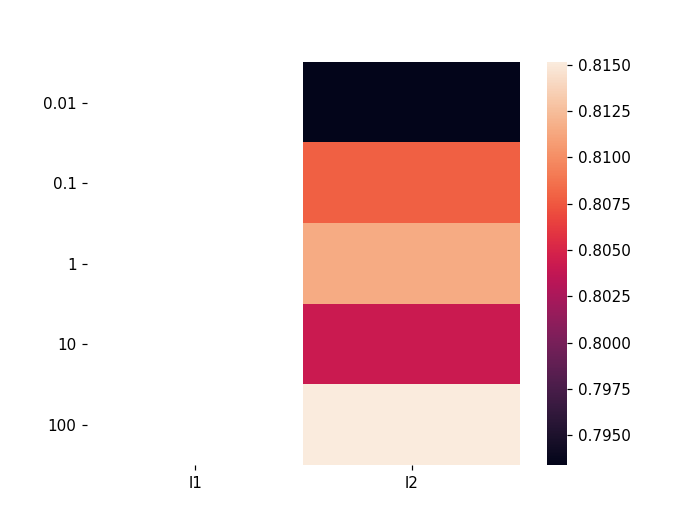

In [17]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())